In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('F:/simplilearn/projects/ml projects/employee turnover analytics/dataset.xlsx')

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
df.shape

(14999, 10)

In [5]:
df=df.rename(columns={'average_montly_hours':'average_weekly_hours','sales':'department'})
df['average_weekly_hours']=df['average_weekly_hours']*12/52
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_weekly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


In [6]:
# no null values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_weekly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [7]:
df = df.loc[:,~df.T.duplicated(keep='first')]

In [8]:
df.shape

(14999, 10)

<IPython.core.display.Javascript object>

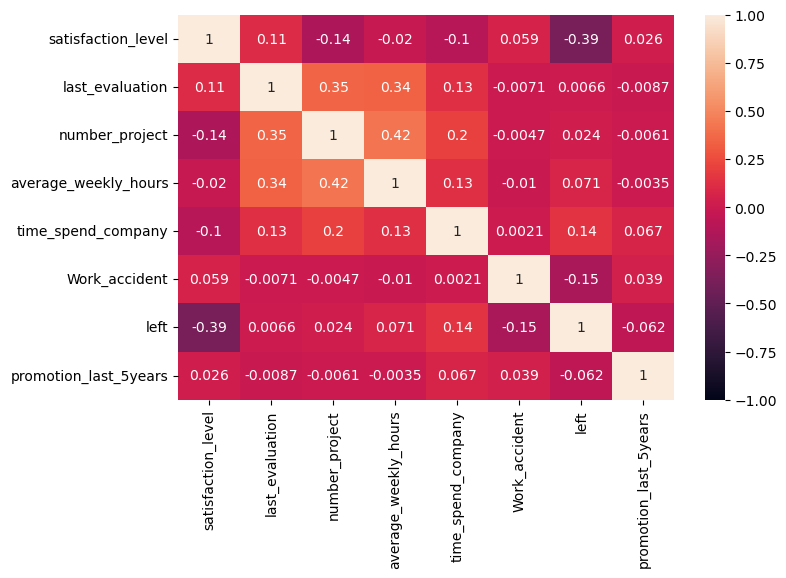

In [9]:
# factors that contributed more to employee turn over
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)
plt.show()

In [10]:
# only the satisfaction level shows some strong negetive releation with ETO with a pearson correleation of -0.39

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

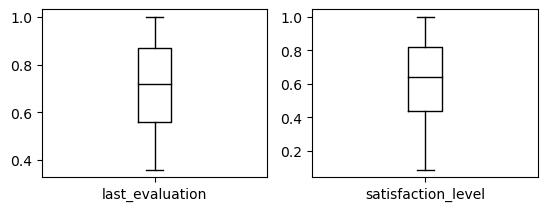

In [12]:
df[['last_evaluation','satisfaction_level']].plot(kind = 'box',subplots = True, layout = (2,2), sharex = False, sharey = False,color='black')
plt.show()

In [13]:
df[['last_evaluation','satisfaction_level']].describe()

,last_evaluation,satisfaction_level
count,14999.000000,14999.000000
mean,0.716102,0.612834
std,0.171169,0.248631
min,0.360000,0.090000
25%,0.560000,0.440000
50%,0.720000,0.640000
75%,0.870000,0.820000
max,1.000000,1.000000


In [14]:
df['left'].value_counts()
# out of every 4 employees 1 employeee has left the company

0    11428
1     3571
Name: left, dtype: int64

In [15]:
df[['Work_accident']].value_counts()

Work_accident
0                12830
1                 2169
dtype: int64

In [16]:
# we can  say the following
# they have a relatively short tenure with the firm (average of 3.5 years, max of 10 years)
# they are generally more satisfied than not (.61 average satisfaction level)
# they are generally above average performers (.716 average rating in their last evaluation)
# 14.46% (approximately 1 in 7) of the people have had work accidents

In [17]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,46.396232,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,11.525331,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,22.153846,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,36.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,46.153846,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,56.538462,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,71.538462,10.000000,1.000000,1.000000,1.000000


In [18]:
df.describe(include='O')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


    department      left
3           hr  0.290934
2   accounting  0.265971
9    technical  0.256250
8      support  0.248991
7        sales  0.244928
5    marketing  0.236597
0           IT  0.222494
6  product_mng  0.219512
1        RandD  0.153748
4   management  0.144444


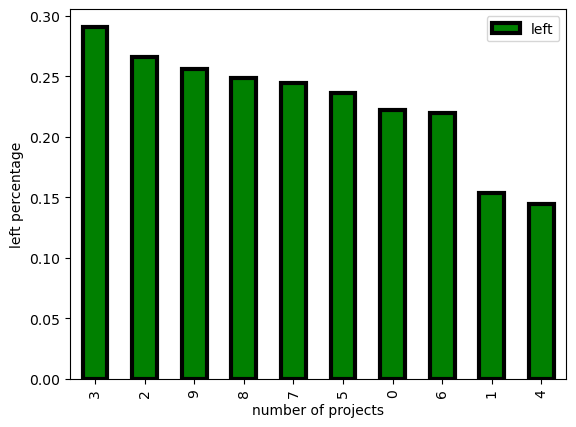

In [19]:
print(df[['department','left']].groupby('department',as_index=False).mean().sort_values(by=['left'],ascending=False))
df[['department','left']].groupby('department',as_index=False).mean().sort_values(by=['left'],ascending=False).plot(kind='bar',color='g',edgecolor='black',linewidth=3)
plt.xlabel('number of projects')
plt.ylabel('left percentage')
plt.show()

   salary      left
1     low  0.296884
2  medium  0.204313
0    high  0.066289


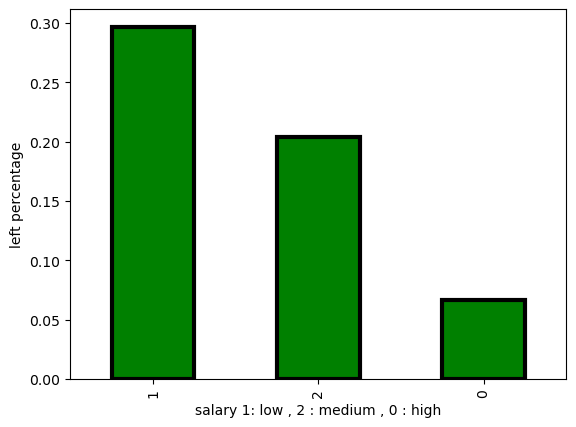

In [20]:
print(df[['salary','left']].groupby('salary',as_index=False).mean().sort_values(by=['left'],ascending=False))
df[['salary','left']].groupby('salary',as_index=False).mean().sort_values(by=['left'],ascending=False)['left'].plot(kind='bar',color='g',edgecolor='black',linewidth=3)
plt.xlabel('salary 1: low , 2 : medium , 0 : high')
plt.ylabel('left percentage')
plt.show()

   number_project      left
5               7  1.000000
0               2  0.656198
4               6  0.557922
3               5  0.221659
2               4  0.093700
1               3  0.017756


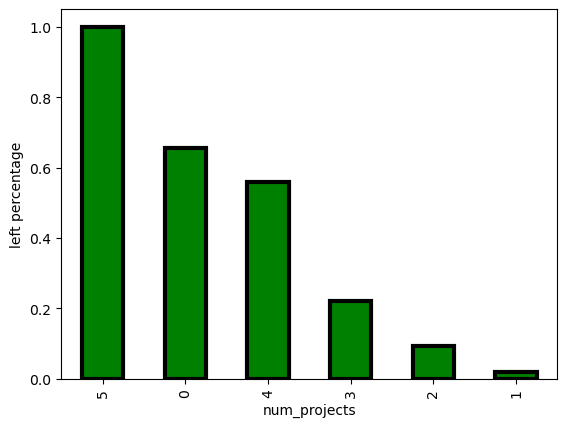

In [21]:
print(df[['number_project','left']].groupby('number_project',as_index=False).mean().sort_values(by=['left'],ascending=False))
df[['number_project','left']].groupby('number_project',as_index=False).mean().sort_values(by=['left'],ascending=False)['left'].plot(kind='bar',color='g',edgecolor='black',linewidth=3)
plt.xlabel('num_projects')
plt.ylabel('left percentage')
plt.show()

   time_spend_company      left
0                   2  0.016338
1                   3  0.246159
2                   4  0.348064
3                   5  0.565513
4                   6  0.291086
5                   7  0.000000
6                   8  0.000000
7                  10  0.000000


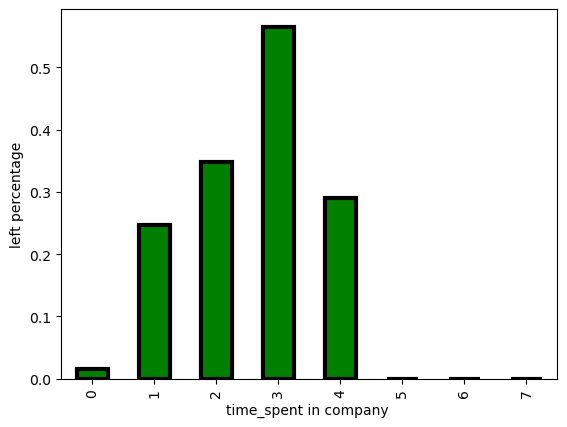

In [22]:
print(df[['time_spend_company', 'left']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='time_spend_company'))
df[['time_spend_company', 'left']].groupby(['time_spend_company'], as_index=False).mean().sort_values(by='time_spend_company')['left'].plot(kind='bar',color='g',edgecolor='black',linewidth=3)

plt.xlabel('time_spent in company ')
plt.ylabel('left percentage')
plt.show()

In [23]:
df[['average_weekly_hours','number_project']].corr()

,average_weekly_hours,number_project
average_weekly_hours,1.000000,0.417211
number_project,0.417211,1.000000


In [24]:
# Observations:

# We observe that lower satisfaction levels are associated with higher levels of turnover, as expected
# Regarding evaluation scores, it's interesting to note the two "clusters" that form; the people who leave tend to either have received low scores (.6 and below) or very high scores (.8 and above). Employees scoring in the middle rarely left.
# A similar clustering effect is shown for the weekly hours graph as well. People tend to leave when they are overworked or underworked. We also observe that the pattern we see for the weekly hours feature is similar to that of the number of projects feature.
# Conclusions:

# Use the satisfaction_level feature in our model
# We may need to do some data wrangling on the last_evaluation feature. Consider creating two bands, exceptional scores (both really good and really bad evaluations) vs. the rest.
# Given that both the weekly hours feature and number of projects feature exhibit a comparable clustering effect and that there is a moderate correlation between these variables (.417, as calculated earlier), I will only use the number of projects feature in my model and discard the weekly hours feature for simplicity.

<IPython.core.display.Javascript object>

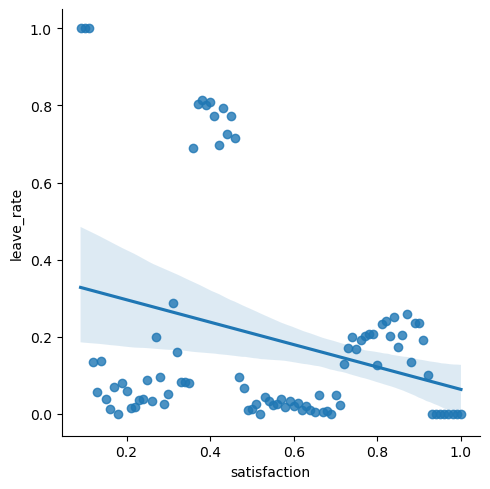

In [25]:
leave_sat=df.groupby('satisfaction_level').agg({'left': lambda x: len(x[x==1])})
leave_sat['total']=df.groupby('satisfaction_level').agg({'left': len})
leave_sat['leave_rate']=leave_sat['left']/leave_sat['total']
leave_sat['satisfaction']=df.groupby('satisfaction_level').agg({'satisfaction_level': 'mean'})
g=sns.lmplot('satisfaction', 'leave_rate',data=leave_sat)

In [49]:
# the more the satisfaction is the lesser is hte leaving rate

<IPython.core.display.Javascript object>

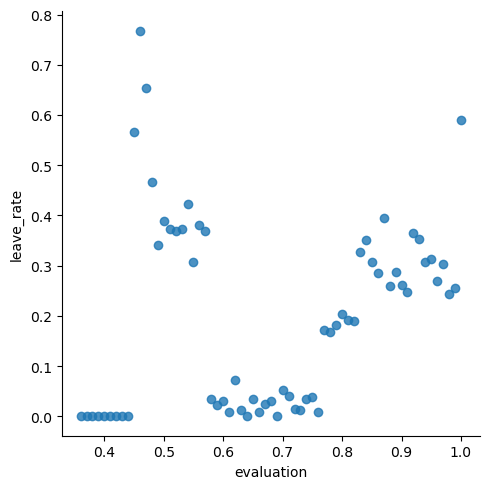

In [26]:
leave_eval=df.groupby('last_evaluation').agg({'left': lambda x: len(x[x==1])})
leave_eval['total']=df.groupby('last_evaluation').agg({'left': len})
leave_eval['leave_rate']=leave_eval['left']/leave_eval['total']
leave_eval['evaluation']=df.groupby('last_evaluation').agg({'last_evaluation': 'mean'})
gr=sns.lmplot('evaluation', 'leave_rate',data=leave_eval,fit_reg=False)

In [50]:
# employees at a evalation score between 0.55 to 0.78 tend to leave less

<IPython.core.display.Javascript object>

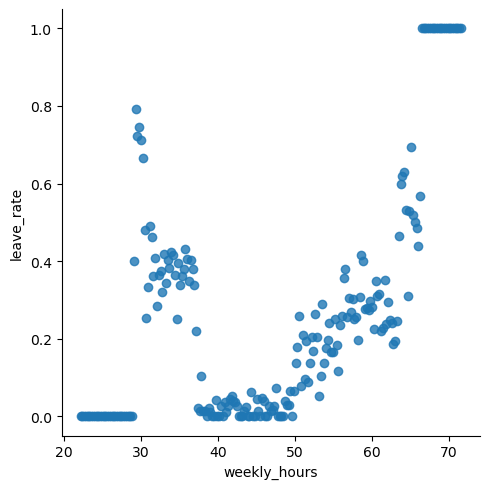

In [27]:
leave_hours=df.groupby('average_weekly_hours').agg({'left': lambda x: len(x[x==1])})
leave_hours['total']=df.groupby('average_weekly_hours').agg({'left': len})
leave_hours['leave_rate']=leave_hours['left']/leave_hours['total']
leave_hours['weekly_hours']=df.groupby('average_weekly_hours').agg({'average_weekly_hours': 'mean'})
grid=sns.lmplot('weekly_hours', 'leave_rate',data=leave_hours,fit_reg=False)

In [28]:
df[['department', 'average_weekly_hours']].groupby(['department'], as_index=False).mean().sort_values(by='average_weekly_hours', ascending=False)

,department,average_weekly_hours
9,technical,46.730175
0,IT,46.665225
4,management,46.442125
2,accounting,46.422224
7,sales,46.364158
1,RandD,46.338579
8,support,46.328813
6,product_mng,46.145915
5,marketing,46.012103
3,hr,45.850317


In [29]:
ll = df[['promotion_last_5years','left']].groupby('promotion_last_5years').sum(['left'])
ll['value_counts'] = df['promotion_last_5years'].value_counts()
ll
# we can see addning prmotion in our predictions doesnt make it meaningful

,left,value_counts
promotion_last_5years,,
0,3552,14680
1,19,319


In [30]:
df[['department','average_weekly_hours']].groupby(['department']).mean(['average_weekly_hours'])
# it doesnt make sense to use the working hours as all show close mean

,average_weekly_hours
department,
IT,46.665225
RandD,46.338579
accounting,46.422224
hr,45.850317
management,46.442125
marketing,46.012103
product_mng,46.145915
sales,46.364158
support,46.328813


In [31]:
df=df.drop(['Work_accident','department','average_weekly_hours','promotion_last_5years'],axis=1)

In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'left', 'salary'],
      dtype='object')

In [33]:
df.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary
0,0.38,0.53,2,3,1,low
1,0.80,0.86,5,6,1,medium
2,0.11,0.88,7,4,1,medium
3,0.72,0.87,5,5,1,low
4,0.37,0.52,2,3,1,low


In [34]:
df['salary'] = df['salary'].map({'low':0,'medium':1,'high':2}).astype('int')

In [35]:
df

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary
0,0.38,0.53,2,3,1,0
1,0.80,0.86,5,6,1,1
2,0.11,0.88,7,4,1,1
3,0.72,0.87,5,5,1,0
4,0.37,0.52,2,3,1,0
...,...,...,...,...,...,...
14994,0.40,0.57,2,3,1,0
14995,0.37,0.48,2,3,1,0
14996,0.37,0.53,2,3,1,0
14997,0.11,0.96,6,4,1,0


In [36]:
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [37]:
# pd.cut for number_projects
probin = [0,2,5,10]
proname=[1,2,3]
df['cut_projects'] = pd.cut(df['number_project'],bins = probin , labels = proname )
# pd.cut for years at company
yearbin = [0,1,2,3,4,5,6,100]
yearlab = [1,2,3,4,5,6,7]
df['cut_year'] = pd.cut(df['time_spend_company'],bins=yearbin,labels=yearlab)
#banding last_evaluation
evalbin=[0,.6,.8,1]
evalname=[0,1,2]
df['cut_eval']=pd.cut(df['last_evaluation'],bins = evalbin,labels=evalname)
df.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,cut_projects,cut_year,cut_eval
0,0.38,0.53,2,3,1,0,1,3,0
1,0.80,0.86,5,6,1,1,2,6,2
2,0.11,0.88,7,4,1,1,3,4,2
3,0.72,0.87,5,5,1,0,2,5,2
4,0.37,0.52,2,3,1,0,1,3,0


In [38]:
df = df.drop(['number_project','time_spend_company','last_evaluation'],axis=1)
df.head()

,satisfaction_level,left,salary,cut_projects,cut_year,cut_eval
0,0.38,1,0,1,3,0
1,0.80,1,1,2,6,2
2,0.11,1,1,3,4,2
3,0.72,1,0,2,5,2
4,0.37,1,0,1,3,0


In [39]:
df.dtypes

satisfaction_level     float64
left                     int64
salary                   int32
cut_projects          category
cut_year              category
cut_eval              category
dtype: object

In [40]:
df[['cut_projects','cut_year','cut_eval']] = df[['cut_projects','cut_year','cut_eval']].astype('int64')

In [41]:
df.head()

,satisfaction_level,left,salary,cut_projects,cut_year,cut_eval
0,0.38,1,0,1,3,0
1,0.80,1,1,2,6,2
2,0.11,1,1,3,4,2
3,0.72,1,0,2,5,2
4,0.37,1,0,1,3,0


In [42]:
df.dtypes

satisfaction_level    float64
left                    int64
salary                  int32
cut_projects            int64
cut_year                int64
cut_eval                int64
dtype: object

# models using different techniques

In [43]:
from sklearn.linear_model import LogisticRegression as lr_
from sklearn.svm import SVC as svc_
from sklearn.neighbors import KNeighborsClassifier as knn_
from sklearn.naive_bayes import GaussianNB as gnb_
from sklearn.tree import DecisionTreeClassifier as dtc_

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,df['left'],test_size=.2)
x_train = x_train.drop('left',axis=1)
x_test = x_test.drop('left',axis=1)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(11999, 5) (11999,)
(3000, 5) (3000,)


In [47]:
models = [lr_(),knn_(),dtc_(),gnb_(),svc_()]
model_names = ['log reg','KNN','DTC','GNB','SVC']
for i in range(len(models)):
    ind_model = models[i].fit(x_train,y_train)
    print(f'{model_names[i]}  ::::  training score  :  {round(ind_model.score(x_train,y_train)*100,1)}      test score :  {round(ind_model.score(x_test,y_test)*100,1)}')

log reg  ::::  training score  :  78.9      test score :  78.8
KNN  ::::  training score  :  97.5      test score :  96.3
DTC  ::::  training score  :  98.5      test score :  97.3
GNB  ::::  training score  :  83.8      test score :  83.1
SVC  ::::  training score  :  94.9      test score :  95.1


In [51]:
models_scores = pd.DataFrame()
models = [lr_(),knn_(),dtc_(),gnb_(),svc_()]
model_names = ['log reg','KNN','DTC','GNB','SVC']
train_scores=[]
test_scores= []
for i in range(len(models)):
    ind_model = models[i].fit(x_train,y_train)
    models_scores['model name'] = model_names[i]
    train_scores.append(ind_model.score(x_train,y_train))
    test_scores.append(ind_model.score(x_test,y_test))

In [52]:
models_scores = pd.DataFrame()
models_scores['model name'] = model_names
models_scores['train scores'] =train_scores
models_scores['test scores'] = test_scores

In [53]:
models_scores

,model name,train scores,test scores
0,log reg,0.789399,0.787667
1,KNN,0.974665,0.963333
2,DTC,0.985415,0.972667
3,GNB,0.837986,0.831000
4,SVC,0.949329,0.951000
